Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [3]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [4]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

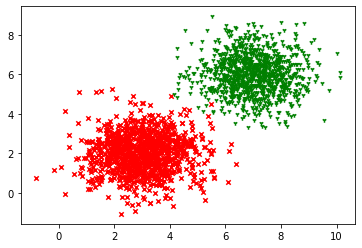

In [5]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [6]:
x_label1

array([ 1.44941336,  1.35782757,  3.78022886,  2.13159593,  5.56896744,
        3.33593781,  4.04226264,  3.20439706,  3.31996147,  2.86100227,
        4.11421191,  2.63799172,  1.52891402,  0.37951778,  3.57521668,
        2.503183  ,  3.01771679,  2.20912874,  3.33036097,  1.90522221,
        3.18755652,  4.49117592,  2.8654874 ,  3.56633675,  4.90923397,
        3.99386198,  1.36337321,  3.34561101,  4.21995137,  3.2277482 ,
        4.02948192,  4.70707024,  1.15166738,  1.5287554 ,  2.679923  ,
        4.83166237,  1.19836966,  4.293955  ,  2.43705651,  3.4448844 ,
        2.41849511,  3.16146633,  3.29685457,  3.03738447,  1.99229893,
        3.67952584,  3.52555085,  2.8697636 ,  3.04910819,  4.75389375,
        3.76856271,  5.24085171,  3.22176999,  2.59245496,  3.18130588,
        4.71741319,  2.03693029,  3.06640954,  2.3945919 ,  3.05526755,
        3.39773779,  1.95989424,  1.76665789,  2.34753942,  2.86869668,
        2.60975495,  2.0558803 ,  3.38519165,  3.22809436,  2.62

Definiujemy model:

In [7]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [8]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [9]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [10]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Przygotowanie danych:

In [12]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[1.44941336, 0.46515802],
       [1.35782757, 2.26612285],
       [3.78022886, 2.27151385],
       ...,
       [5.02367742, 4.31663031],
       [7.14511973, 4.72852997],
       [7.58910918, 6.05561945]])

Proces **uczenia**:

In [13]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 9ms/step - loss: 0.6808 - val_loss: 0.1671
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4435 - val_loss: 0.2403
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.3559 - val_loss: 0.1831
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2999 - val_loss: 0.2332
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2576 - val_loss: 0.2324
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.2256 - val_loss: 0.1530
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2014 - val_loss: 0.1377
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1830 - val_loss: 0.1198
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1669 - val_loss: 0.1589
Epoch 10/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1546 - val_loss: 0.0883
Epoch 11/

In [14]:
Loss = h.history['loss']
Loss

[0.6807949542999268,
 0.4435085952281952,
 0.3558792173862457,
 0.2999304533004761,
 0.25762686133384705,
 0.22564348578453064,
 0.20140166580677032,
 0.1830454021692276,
 0.16692863404750824,
 0.1546112298965454,
 0.14313337206840515,
 0.13526585698127747,
 0.12587985396385193,
 0.11961708217859268,
 0.11317002028226852,
 0.10783258080482483,
 0.10268449038267136,
 0.09880365431308746,
 0.09430186450481415,
 0.09058410674333572,
 0.08777061104774475,
 0.08471404016017914,
 0.08183244615793228,
 0.07964075356721878,
 0.07707184553146362,
 0.075049489736557,
 0.07289909571409225,
 0.07067001610994339,
 0.06896388530731201,
 0.06746569275856018,
 0.06565023213624954,
 0.06433440744876862,
 0.06275233626365662,
 0.06114765629172325,
 0.06028449535369873,
 0.058852847665548325,
 0.05778280273079872,
 0.05678950622677803,
 0.05555161461234093,
 0.05458059906959534,
 0.053727105259895325,
 0.052589401602745056,
 0.05181742087006569,
 0.05108642578125,
 0.050221994519233704,
 0.04936468228697

Sprawdźmy jakie są **wartości wag**:

In [15]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.0017886]
 [1.3446786]]
[-10.618045]


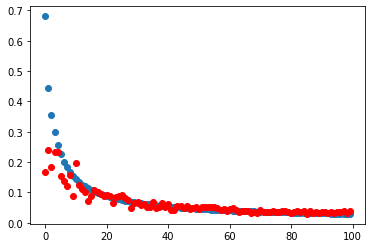

In [16]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

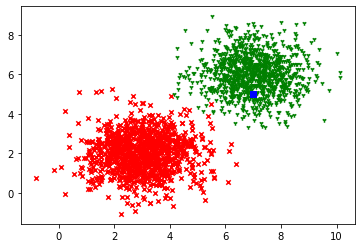

In [17]:
x=7.0
y=5.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [18]:
model.predict([[x,y]])

1/1 [==============================] - 0s 79ms/step


array([[0.95762384]], dtype=float32)